# Query environment

In [ ]:
#Be aware of your Jupyter environment stack:
display(Base.load_path())

# Setup environment

In [2]:
using RSDeltaSigmaPort
j=im
:READY

:READY

# NTF synthesis-- 5th-order modulator

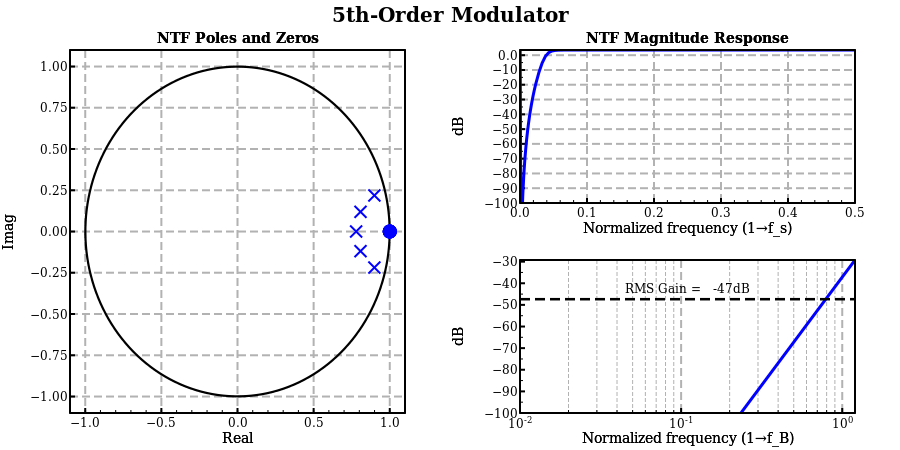

In [3]:
OSR = 32
NTF5_noopt = synthesizeNTF(5, OSR, opt=0)
plot = plotNTF(NTF5_noopt, OSR, color=:blue)
plot.title = "5th-Order Modulator"
inlinedisp(plot, AR=2/1)

# NTF synthesis-- 5th-order modulator (optimized zeros)

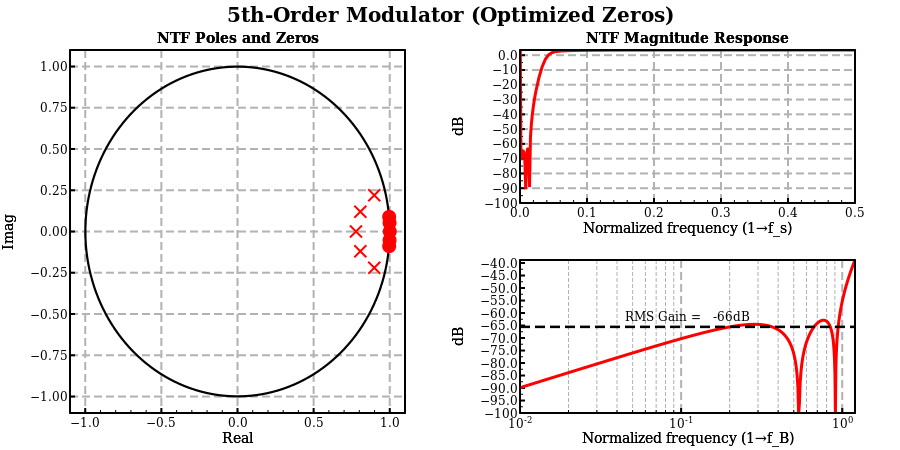

In [4]:
OSR = 32
NTF5_opt = synthesizeNTF(5, OSR, opt=1)
plot = plotNTF(NTF5_opt, OSR, color=:red)
plot.title = "5th-Order Modulator (Optimized Zeros)"
inlinedisp(plot, AR=2/1)

# NTF synthesis-- 5th-order modulator (Comparison)¶

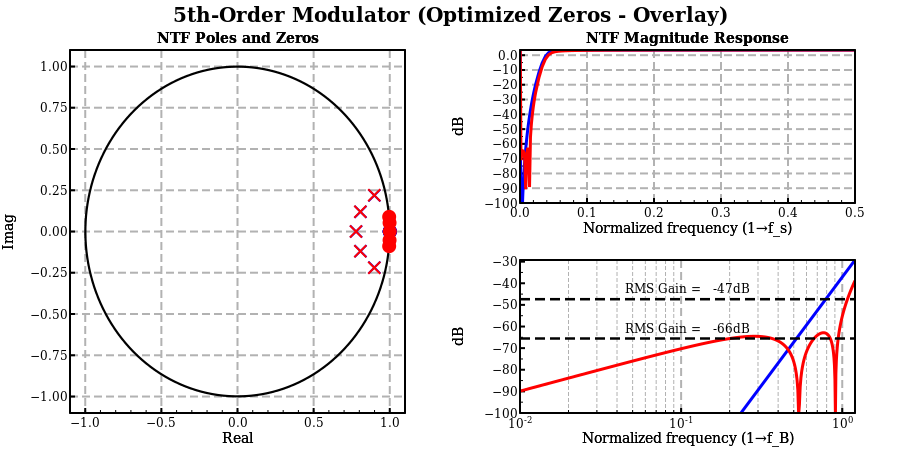

In [5]:
OSR = 32
plot = plotNTF(NTF5_noopt, OSR, color=:blue)
plot = plotNTF!(plot, NTF5_opt, OSR, color=:red)
plot.title = "5th-Order Modulator (Optimized Zeros - Overlay)"
inlinedisp(plot, AR=2/1)

# NTF synthesis-- 8th-order bandpass modulator

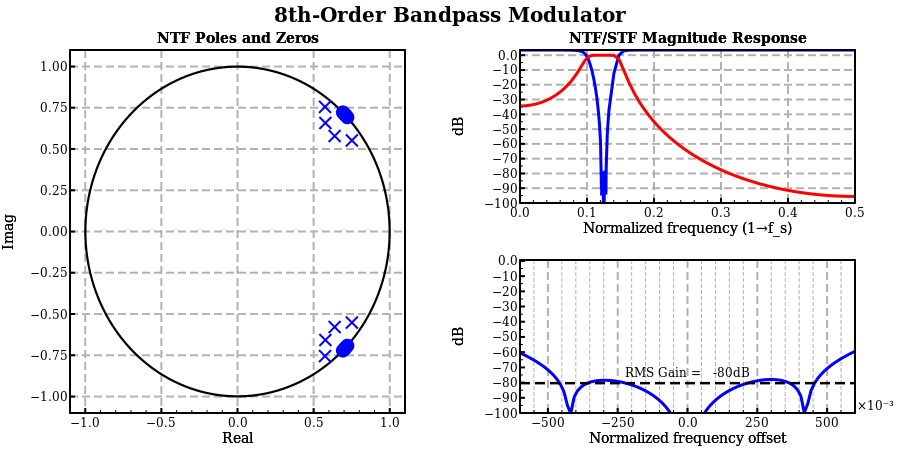

In [7]:
OSR = 64
order = 8
f0 = 0.125 #fs/8

NTF8bp_opt2 = synthesizeNTF(order, OSR, opt=2, f0=f0)
function gainNTF(order, OSR, NTF)
	G = _zpk(zeros(array_round(order/2)),NTF.p,1,1)
	G.k = 1/abs(evalTF(G,exp(2π*j*f0)))
	return G
end
G = gainNTF(order, OSR, NTF8bp_opt2)
plot = plotNTF(NTF8bp_opt2, OSR, color=:blue, f0=f0, G=G)
plot.title = "8th-Order Bandpass Modulator"
inlinedisp(plot, AR=2/1)

# DONE